In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

plt.style.use('ggplot')

In [68]:
# загрузка файла в формате .csv
#from google.colab import files
#uploaded = files.upload()
df = pd.read_excel('base-small.xlsx', na_values='-', index_col=0)

In [69]:
X = df.drop('Исход', 1) 
y = df['Исход']

/var/folders/pt/1nd8f39x3h116nnrbqlgpbdw0000gn/T/ipykernel_15224/50795730.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('Исход', 1)


In [70]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler 
 
scaler = StandardScaler() 
scaler.fit(X)
X_scaled = scaler.transform(X)

In [71]:
# Применение PCA
from sklearn.decomposition import PCA 
# количество атрибутов, которые передаем в алгоритм, если запустить pca = PCA(), то в следующем окне explained_variance можно увидеть значение дисперсии для каждого атрибута
# нужно экспериментировать и подбирать кол-во атрибутов. Я брал 0.9, так как это содержит 90 процентов всей информации, что довольно много + сокращает кол-во атрибутов. 
# можно брать не проценты, а кол-во 
# перезапускать программу при изменении n_components надо с инициализации X, y 
pca = PCA() 
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled)

In [72]:
# значение дисперсии для атрибутов
explained_variance = pca.explained_variance_ratio_ 
print(explained_variance)

[5.35671738e-02 3.88104948e-02 3.33883588e-02 2.84630245e-02
 2.50735153e-02 2.16588860e-02 2.01924410e-02 1.86874992e-02
 1.78323926e-02 1.64700905e-02 1.56553187e-02 1.55364768e-02
 1.47053926e-02 1.39584303e-02 1.31593535e-02 1.27709503e-02
 1.23390441e-02 1.20640795e-02 1.14502929e-02 1.13143046e-02
 1.10251245e-02 1.06967125e-02 1.04815611e-02 1.01373401e-02
 9.48512933e-03 9.25626514e-03 9.06667022e-03 8.80183102e-03
 8.56786021e-03 8.50064232e-03 8.08529125e-03 7.84505561e-03
 7.73596057e-03 7.70636825e-03 7.40786179e-03 7.34938394e-03
 7.19701342e-03 7.04829534e-03 6.93309306e-03 6.74680454e-03
 6.60603341e-03 6.57235464e-03 6.40219693e-03 6.28210053e-03
 6.22464595e-03 6.02667081e-03 5.99539716e-03 5.72008825e-03
 5.68524897e-03 5.61364769e-03 5.44341090e-03 5.36023751e-03
 5.27756471e-03 5.18601407e-03 5.05074747e-03 5.04199704e-03
 4.97782492e-03 4.95737666e-03 4.82693410e-03 4.74800489e-03
 4.70068495e-03 4.54091734e-03 4.49948645e-03 4.46659558e-03
 4.41886280e-03 4.362725

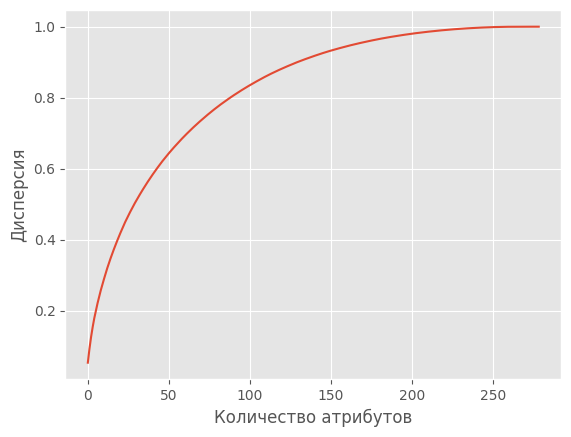

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество атрибутов')
plt.ylabel('Дисперсия')
plt.savefig('elbow_plot.png', dpi=100)

In [74]:
pca = PCA(n_components=20) 
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled)

X_pca.shape

(926, 20)

In [76]:
print(X_pca)

[[-5.28689185  6.0628065  -2.22580508 ...  1.16678675  0.83209347
   0.60341231]
 [-0.26561716  0.21475878 -0.34283239 ... -0.42032187  0.12660178
  -0.08474577]
 [-6.38382078 -1.02532632  3.41733806 ... -1.74453302 -2.71259872
   4.60549502]
 ...
 [-0.74103375 -0.79697071  1.32974096 ...  0.62896248  0.66161071
  -0.27649999]
 [ 1.5002617  -2.57839166  1.67885875 ...  1.12739551 -0.21803591
   0.6675998 ]
 [-0.20407683  0.38117034 -0.16367299 ... -0.0871596   0.13898128
  -0.13408048]]


In [75]:
df_new = pd.DataFrame(X_pca)
df_new['Исход'] = y
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Исход
0,-5.286892,6.062807,-2.225805,0.970057,9.395250,-0.786571,1.540241,-1.374832,-2.386710,-0.630306,...,3.511034,5.385527,0.153624,-2.331901,0.662679,1.885741,1.166787,0.832093,0.603412,1.0
1,-0.265617,0.214759,-0.342832,0.392223,-0.058374,-0.634379,0.041522,0.011293,0.113210,0.232597,...,0.323153,-0.005168,-0.237397,0.300387,-0.051662,-0.184262,-0.420322,0.126602,-0.084746,1.0
2,-6.383821,-1.025326,3.417338,2.997937,8.345189,1.261270,1.052824,4.493165,-0.741223,3.892374,...,3.546050,3.515177,2.050835,-4.719389,-3.520026,2.286501,-1.744533,-2.712599,4.605495,1.0
3,-2.169967,0.147092,0.059845,1.383593,0.939060,-1.031840,-0.033895,-0.829112,1.182150,1.347688,...,0.558245,0.541272,-0.090893,-0.736843,0.731336,-1.237927,-1.284772,-0.039984,-0.075378,1.0
4,3.463552,2.890177,1.064756,-0.913438,0.520015,-5.597298,0.363643,-4.660159,0.625245,-1.141813,...,5.989198,2.495758,-1.542446,-3.139924,-4.510602,1.789149,-3.133653,6.140551,-0.435200,1.0


In [77]:
# создание новой таблицы с уменьшенным кол-вом атрибутов
df_new.to_csv('new_table.csv', index=False)

In [78]:
#IMPORT PACKAGES
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [79]:
df_new = df_new.fillna(0)

In [80]:
#LOAD DATA
data= df_new

In [81]:
#view first six rows of dataset
data[0:6]

#find total observations in dataset
len(data.index)

#FIT LOGISTIC REGRESSION MODEL
X = df_new.drop('Исход', 1) 
y = df_new['Исход']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, test_size=0.3,random_state=0)

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

/var/folders/pt/1nd8f39x3h116nnrbqlgpbdw0000gn/T/ipykernel_15224/3420659010.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_new.drop('Исход', 1)


In [82]:
coefficients = log_regression.coef_
intercept = log_regression.intercept_
print('coefficients: ', coefficients)
print('intercept: ', intercept)



coefficients:  [[-0.47157716 -0.10867364 -0.20359819  0.40384035  0.11636462 -0.10386119
  -0.02584901  0.07543922  0.01040458  0.0673193  -0.20864655 -0.01463644
   0.04219296  0.05127378  0.08460979 -0.26696333 -0.1665083  -0.05613307
   0.21344589 -0.22765332]]
intercept:  [0.73815596]


In [83]:
coefficients.shape


(1, 20)

Accuracy: 0.8597122302158273
Precision: 0.8645833333333334
Recall: 0.9273743016759777


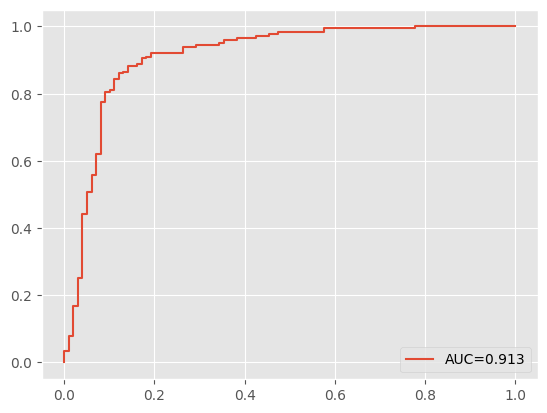

In [85]:

#MODEL DIAGNOSTICS
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:",metrics.precision_score(y_test, y_pred))
print ("Recall:",metrics.recall_score(y_test, y_pred))

#plot ROC curve
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str('%.3f' % auc))
plt.legend(loc=4)
plt.show()